Computer Vision

Dökümantasyon: https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/

API Console: https://westcentralus.dev.cognitive.microsoft.com/docs/services/computer-vision-v3-ga/operations/5d986960601faab4bf452005

Servisler:
    
    Image Analysis
    
    Optical Character Recognition (OCR)
    
    Spatial Analysis (Container)

In [60]:
import requests
%matplotlib inline
import matplotlib.pyplot as plt
import json
from PIL import Image
from io import BytesIO

In [61]:
endpoint = 'your_endpoint' 
subscription_key = 'your_key'

1- IMAGE ANALYSIS

In [62]:
analyze_url = endpoint + "vision/v3.1/analyze"

Image URL

In [63]:
image_url = "https://i0.wp.com/rayhaber.com/wp-content/uploads/2020/07/anitkabir-hakkinda.jpg?resize=678%2C381&ssl=1"
data = {'url': image_url}

{"categories": [{"name": "building_pillar", "score": 0.99609375, "detail": {"landmarks": [{"name": "An\u0131tkabir", "confidence": 0.9999979734420776}]}}], "color": {"dominantColorForeground": "Black", "dominantColorBackground": "Grey", "dominantColors": ["Grey"], "accentColor": "8F723C", "isBwImg": false, "isBWImg": false}, "description": {"tags": ["outdoor", "sky", "building", "colonnade"], "captions": [{"text": "a large stone building with people walking around with An\u0131tkabir in the background", "confidence": 0.3468005359172821}]}, "requestId": "5d6d975b-4146-41cc-aa62-48b989311b3f", "metadata": {"height": 381, "width": 678, "format": "Jpeg"}}


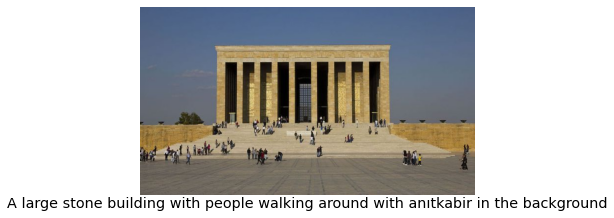

In [64]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {'visualFeatures': 'Categories,Description,Color'}
response = requests.post(analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()

analysis = response.json()
print(json.dumps(response.json()))
image_caption = analysis["description"]["captions"][0]["text"].capitalize()


image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)
plt.show()

2- OCR

In [56]:
analyze_url = endpoint + "vision/v3.2-preview.3/ocr"

Image URL

In [57]:
image_url = "https://i0.wp.com/www.msazureturkey.com/wp-content/uploads/2015/05/sql-azure.png"
data = {'url': image_url}

{"language": "de", "textAngle": 0.043633231299858834, "orientation": "Up", "regions": [{"boundingBox": "149,102,171,52", "lines": [{"boundingBox": "151,102,67,14", "words": [{"boundingBox": "151,102,67,14", "text": "Microsoft\u2022"}]}, {"boundingBox": "149,116,171,38", "words": [{"boundingBox": "149,116,66,38", "text": "SQL"}, {"boundingBox": "221,119,99,34", "text": "Azure"}]}]}]}


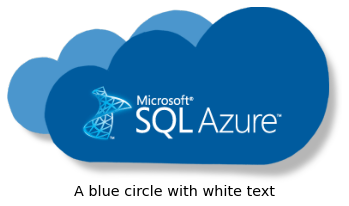

In [59]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {'visualFeatures': 'Categories,Description,Color'}
response = requests.post(analyze_url, headers=headers, json=data)
response.raise_for_status()
analysis = response.json()
print(json.dumps(response.json()))

image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)
plt.show()